# importing libraries
### our neural network will be built using Keras and Tensorflow

In [158]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# model of reading data from edf file
we have 44 edf files in our dataset, each file contains 23 channels of data, and we are using only two of those channels.
we have to arrays first files_to_read contains the name of the files and second is the labels of the files and seizure start and end time.

In [159]:
# files to read => chb01_03.edf, chb01_04.edf, chb01_15.edf,  chb01_16.edf,  chb01_18.edf,  chb01_21.edf,  chb01_26.edf,  chb02_16.edf, chb02_19.edf, chb03_01.edf, chb03_02.edf, chb03_03.edf, chb03_04.edf
files_to_read = [
        'chb01_03.edf',
        'chb01_04.edf',
        'chb01_15.edf',
        'chb01_16.edf',
        'chb01_18.edf',
        'chb01_21.edf',
        'chb01_26.edf',
        'chb02_16.edf',
        'chb02_19.edf',
        'chb03_01.edf',
        'chb03_02.edf',
        'chb03_03.edf',
        'chb03_04.edf',
        'chb04_05.edf',
        'chb04_28.edf',
        'chb05_06.edf',
        'chb05_13.edf',
        'chb05_16.edf',
        'chb05_17.edf',
        'chb05_22.edf',
        'chb06_04.edf',
        'chb06_09.edf',
        'chb06_10.edf',
        'chb06_13.edf',
        'chb06_18.edf',
        'chb06_24.edf',
        'chb07_12.edf',
        'chb07_13.edf',
        'chb07_19.edf',
        'chb08_02.edf',
        'chb08_05.edf',
        'chb08_11.edf',
        'chb08_13.edf',
        'chb08_21.edf',
        'chb09_06.edf',
        'chb09_08.edf',
        'chb09_19.edf',
        'chb10_12.edf',
        'chb10_20.edf',
        'chb10_27.edf',
        'chb10_30.edf',
        'chb10_31.edf',
        'chb10_38.edf',
        'chb10_89.edf',
        ]
seizure_seconds_each_file_start_and_end_seconds = [
        ('chb01_03.edf',2996, 3036),
        ('chb01_04.edf', 1467, 1494),
        ('chb01_15.edf', 1732, 1772),
        ('chb01_16.edf',1015, 1066),
        ('chb01_18.edf', 1720, 1810),
        ('chb01_21.edf', 327, 420),
        ('chb01_26.edf', 1862, 1963),
        ('chb02_16.edf', 130, 212),
        ('chb02_19.edf', 2972, 3053),
        ('chb03_01.edf', 362, 414),
        ('chb03_02.edf', 731, 796),
        ('chb03_03.edf', 432, 501),
        ('chb03_04.edf', 2162, 2214),
        ('chb04_05.edf', 7804, 7853),
        ('chb04_28.edf', 1679, 1781),
        ('chb05_06.edf', 417, 532),
        ('chb05_13.edf', 1086, 1196),
        ('chb05_16.edf', 2317, 2413),
        ('chb05_17.edf', 2451, 2571),
        ('chb05_22.edf', 2348, 2465),
        ('chb06_04.edf', 327, 347),
        ('chb06_09.edf', 12500, 12516),
        ('chb06_10.edf', 10833, 10845),
        ('chb06_13.edf', 506, 519),
        ('chb06_18.edf', 7799, 7811),
        ('chb06_24.edf', 9387, 9403),
        ('chb07_12.edf', 4920, 5006),
        ('chb07_13.edf', 3285, 3381),
        ('chb07_19.edf', 13688, 13831),
        ('chb08_02.edf', 2670, 2841),
        ('chb08_05.edf', 2856, 3046),
        ('chb08_11.edf', 2988, 3122),
        ('chb08_13.edf', 2417, 2577),
        ('chb08_21.edf', 2083, 2347),
        ('chb09_06.edf', 12231, 12295),
        ('chb09_08.edf', 2951, 3030),
        ('chb09_19.edf', 5299, 5361),
        ('chb10_12.edf', 6313, 6348),
        ('chb10_20.edf', 6888, 6958),
        ('chb10_27.edf', 2382, 2447),
        ('chb10_30.edf', 3021, 3079),
        ('chb10_31.edf', 3801, 3877),
        ('chb10_38.edf', 4618, 4707),
        ('chb10_89.edf', 1383, 1437),
        ]
signals = []

for file in files_to_read:
        f = pyedflib.EdfReader(file)
        n = f.signals_in_file
        signal_labels = f.getSignalLabels()
        fz_cz_index = signal_labels.index('FZ-CZ')
        cz_pz_index = signal_labels.index('CZ-PZ')
        sigbufs = np.zeros((2, f.getNSamples()[0]))
        sigbufs[0] = f.readSignal(fz_cz_index)
        sigbufs[1] = f.readSignal(cz_pz_index)
        signals.append(np.array(sigbufs))
        f.close()
print(len(signals), len(files_to_read), len(seizure_seconds_each_file_start_and_end_seconds))

44 44 44


## shape of each signal 
as you can see the shape of each signal in signals array is (2, 921600) which means that each signal has 2 channels and each channel has 921600 data points which is 1 hour of data and in each second we have 256 data points.

In [160]:
signals[0].shape

(2, 921600)

## getting only part of the signals array
we can not use all the data in our model because it will decrease the accuracy of our model why? because each patients brain signals are different

In [161]:
shortened_signals = signals[0:18]

## the below plots are just some of the signals of patients that have seizure and patients that don't have seizure

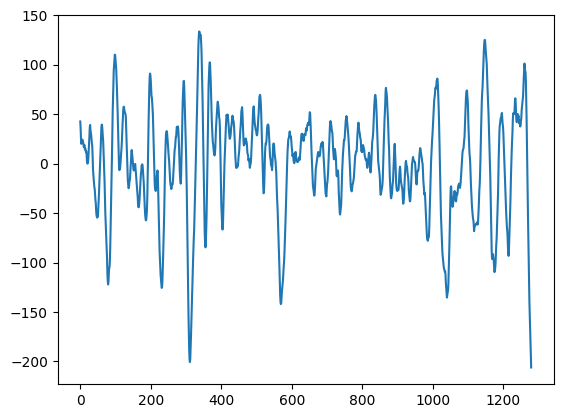

In [162]:
#plot the signal of first file from start seizure time to end seizure time
plt.plot(signals[0][0][2996*256:3001*256])

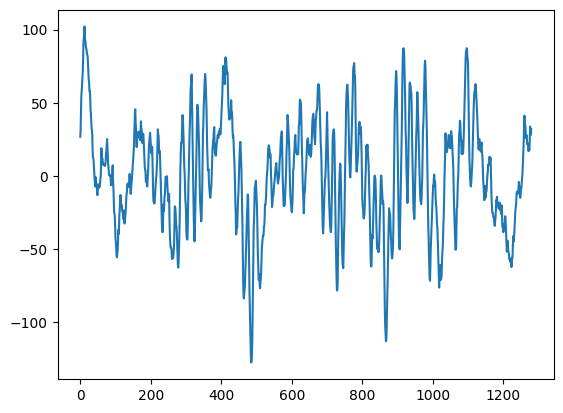

In [163]:
plt.plot(signals[1][0][500*256:505*256])

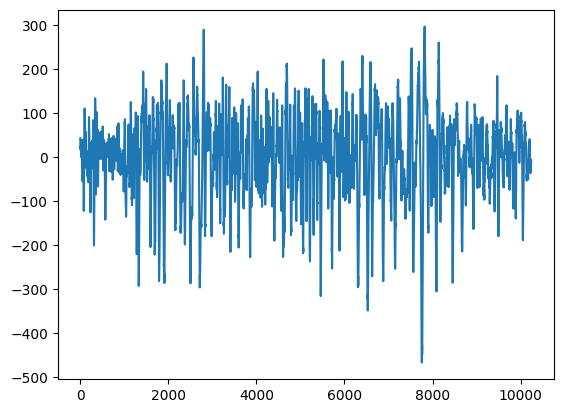

In [164]:
#plot the signal of first file from start seizure time to end seizure time
plt.plot(signals[0][0][2996*256:3036*256])

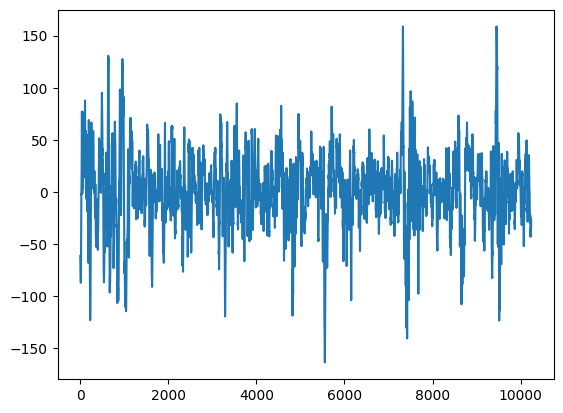

In [165]:
plt.plot(signals[0][0][2700*256:2740*256])

## getting the seizure part of the signal and labeling it with 5*256 window
we are using 5 seconds window to label the seizure part of the signal and for getting more data we are using 5 seconds window for each second of the seizure part of the signal
#### why we are using try and except?
because some of the signals data is not in the same shape as the other signals data so we have to use try and except to get the data in the same shape

In [166]:
window_size = 5 * 256
seizure_data_signals = np.zeros((0, 2, window_size))
seizure_data_y_labels = []

for i in range(len(shortened_signals)):
    try:
        start_time = seizure_seconds_each_file_start_and_end_seconds[i][1]*256
        end_time = seizure_seconds_each_file_start_and_end_seconds[i][2]*256
        for j in range(start_time, end_time, 256):
            seizure_data_signals = np.append(seizure_data_signals, np.array([shortened_signals[i][:, j:j+window_size]]), axis=0)
            seizure_data_y_labels.append(1)
    except:
        print("error in file:")
        print(i)
        continue
len(seizure_data_y_labels)

1315

## the below plot is a 5 second window of the seizure part of the signal

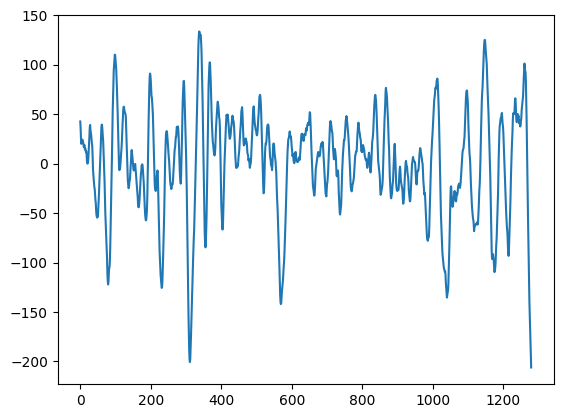

In [167]:
plt.plot(seizure_data_signals[0][0])

## deleting the first 5% and last 5% of the signal (usually noise)
we are deleting the first 5% and last 5% of the signal because usually the first 5% and last 5% of the signal is noise

In [168]:
#delete the first 5 percent and last 5 percent of the signal
import copy
new_signals = copy.deepcopy(shortened_signals)
for i in range(len(new_signals)):
    new_signals[i] = new_signals[i][:,int(0.05*len(new_signals[i][0])):int(0.95*len(new_signals[i][0]))]

## deleting the seizure part of the signal

In [169]:
#delete the seizure time from the signals
for i in range(len(new_signals)):
    try:
        start_time = seizure_seconds_each_file_start_and_end_seconds[i][1]*256
        end_time = seizure_seconds_each_file_start_and_end_seconds[i][2]*256
        new_signals[i] = np.delete(new_signals[i], np.s_[start_time:end_time], axis=1)
    except:
        print("error in file:")
        print(i)
        continue

In [170]:
print(new_signals[0].shape, shortened_signals[0].shape)

(2, 819200) (2, 921600)


## getting the non-seizure part of the signal and labeling it with 5*256 window randomly

#### why we are getting the non-seizure part of the signal randomly?
because of generalization, if we get the non-seizure part of the signal in the same way as the seizure part of the signal then the model will learn the seizure part of the signal and it will not be able to generalize the seizure part of the signal to the non-seizure part of the signal

In [171]:
import random
non_seizure_data_signals = np.zeros((0, 2, window_size))
non_seizure_data_y_labels = []

for i in range(len(new_signals)):
    for j in range(160):
        random_index = random.randint(0, len(new_signals[i][0])-window_size)
        non_seizure_data_signals = np.append(non_seizure_data_signals, np.array([new_signals[i][:, random_index:random_index+window_size]]), axis=0)
        non_seizure_data_y_labels.append(0)

len(non_seizure_data_y_labels)

2880

In [172]:
non_seizure_data_signals.shape

(2880, 2, 1280)

## the below plots are some of the non-seizure part of the signal that we got randomly 

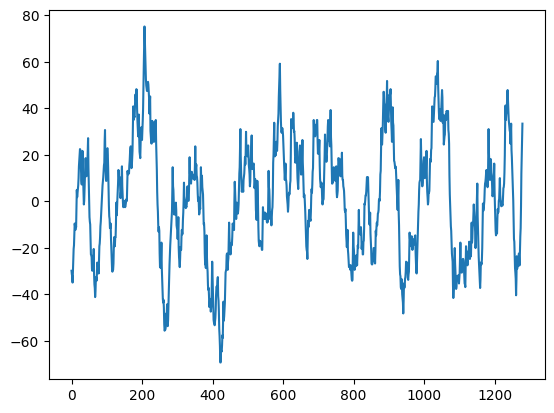

In [173]:
plt.plot(non_seizure_data_signals[0][0])

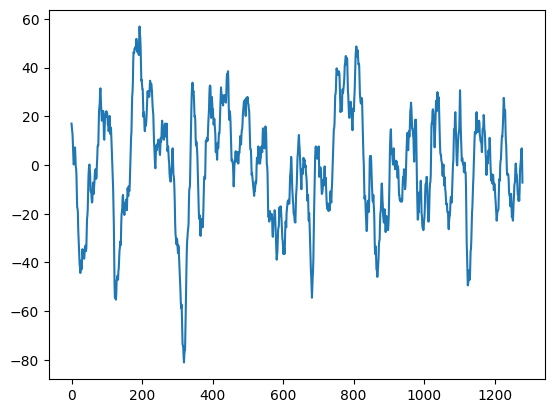

In [174]:
plt.plot(non_seizure_data_signals[450][0])

## our final data which we are going to use in our model 

In [175]:
final_signals =np.zeros((0, 2, window_size))
final_y_labels = []

In [176]:
final_signals = np.append(seizure_data_signals, non_seizure_data_signals, axis=0)
final_y_labels = np.append(seizure_data_y_labels, non_seizure_data_y_labels, axis=0)

In [177]:
print(final_signals.shape, final_y_labels.shape)

(4195, 2, 1280) (4195,)


## a more general view of some of the data in our final data

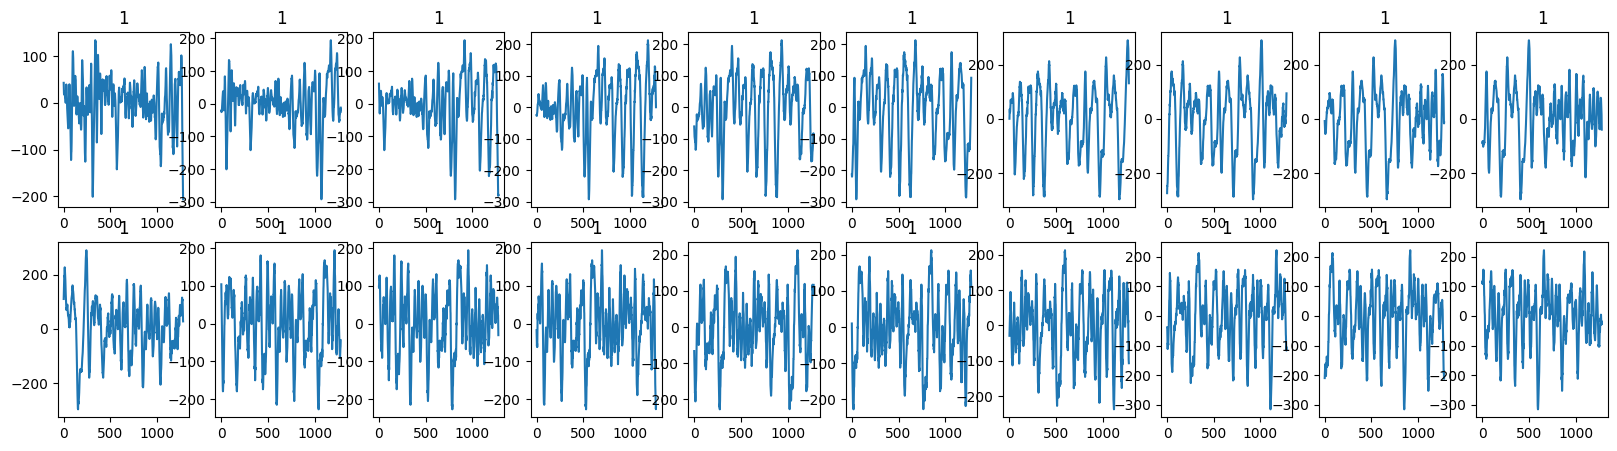

In [178]:
#plot 10 signals with label 1 and 10 signals with label 0 in a grid of small plots
fig, axs = plt.subplots(2, 10, figsize=(20, 5))
for i in range(10):
    axs[0, i].plot(final_signals[i][0])
    axs[0, i].set_title(final_y_labels[i])
    axs[1, i].plot(final_signals[i+10][0])
    axs[1, i].set_title(final_y_labels[i+10])

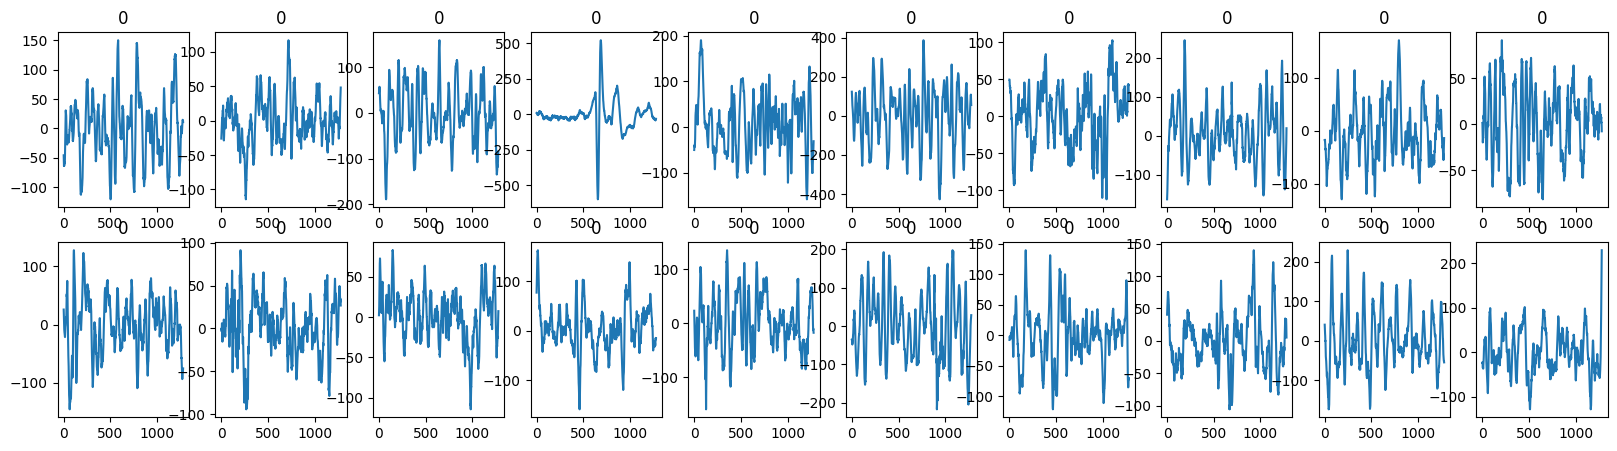

In [179]:
#plot 10 signals from last of the array
fig, axs = plt.subplots(2, 10, figsize=(20, 5))
for i in range(10):
    axs[0, i].plot(final_signals[-i-1][0])
    axs[0, i].set_title(final_y_labels[-i-1])
    axs[1, i].plot(final_signals[-i-11][0])
    axs[1, i].set_title(final_y_labels[-i-11])

## feature extraction 

### variance
we are using variance as a feature because it is a good feature for detecting seizure
what is variance?
variance is a measure of how far a set of numbers are spread out from their average value.

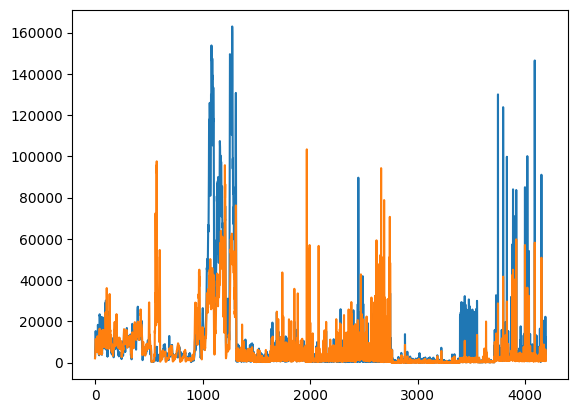

In [180]:
var = np.var(final_signals, axis=2)
plt.plot(var)

### fft
we are using fft as a feature because it is a good feature for detecting seizure
what is fft?
fft is a fast fourier transform which is a mathematical function that converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa.

In [181]:
fft = np.fft.fft(final_signals, axis=2)
fft.shape

(4195, 2, 1280)

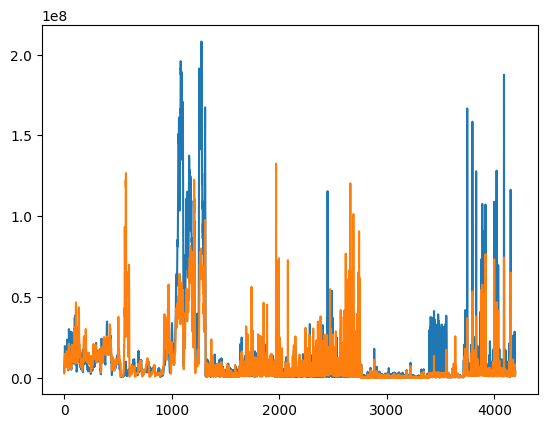

In [182]:
fft_var = np.var(fft, axis=2)
plt.plot(fft_var)

## energy
we are using energy as a feature because it is a good feature for detecting seizure

what is energy?
energy is the sum of the squares of the values in a signal.

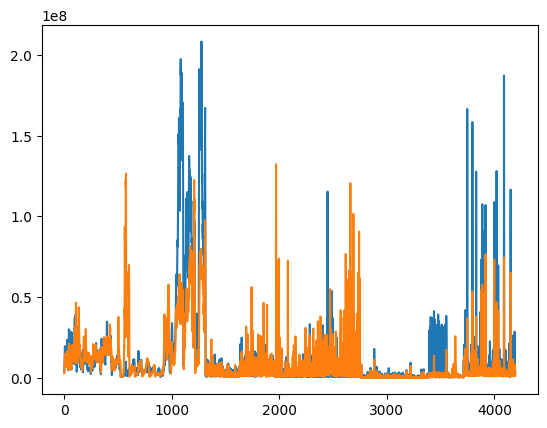

In [183]:
energy = np.sum(np.square(final_signals), axis=2)
plt.plot(energy)

## complexity

what is complexity?
complexity is a measure of the amount of information in a signal.

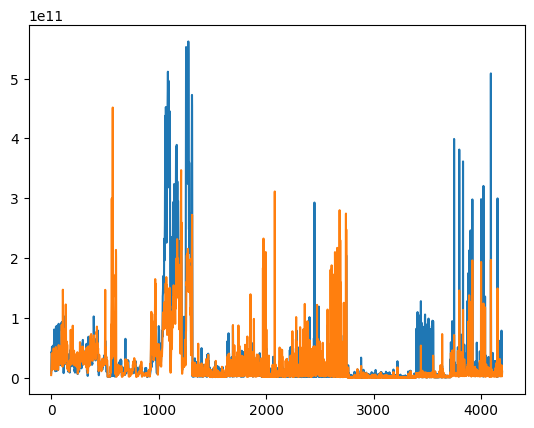

In [184]:
#complexity
complexity = np.sum(np.square(np.abs(np.diff(fft, axis=2))), axis=2)
plt.plot(complexity)

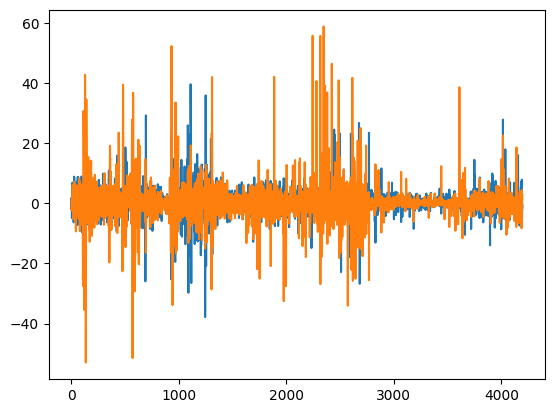

In [185]:
mean = np.mean(final_signals, axis=2)
plt.plot(mean)

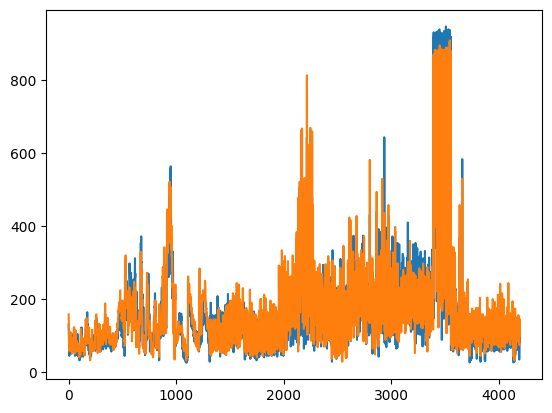

In [194]:
#zero crossing rate
zero_crossing_rate = np.sum(np.abs(np.diff(np.sign(final_signals), axis=2)), axis=2)
plt.plot(zero_crossing_rate)

## concatenating the features

In [195]:
features = np.concatenate((var, zero_crossing_rate, energy, complexity, mean), axis=1)
features.shape

(4195, 10)

## now let's test the features that we got with a random forest classifier

In [198]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 


#split the data to train and test

X_train, X_test, y_train, y_test = train_test_split(features, final_y_labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

0.8522050059594756


array([[499,  45],
       [ 79, 216]], dtype=int64)

In [197]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

#use just one channel of the signals
final_signals_one_channel = final_signals[:, 0, :]

#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(final_signals_one_channel, final_y_labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
#confusion matrix
confusion_matrix(y_test, y_pred)

0.699642431466031


array([[543,   1],
       [251,  44]], dtype=int64)

In [199]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(final_signals, final_y_labels, test_size=0.2, random_state=42)

In [204]:
X_train.shape

(3356, 2, 1280)

In [205]:
#one hot encode target column
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# big model(the best one)
our model has 3 convolutional layers and 3 max pooling layers and 2 dense layers and 1 output layer

kernel size: the size of the window that we are going to use in our model<br />
filters: the number of filters that we are going to use in our model<br />
dense layer: the number of neurons that we are going to use in our model<br />
dropout layer: the number of neurons that we are going to drop in our model<br />

* first convolutional layer has 256 filters and kernel size of 5 and relu activation function and input shape of window size(256*5, 2)
* first max pooling layer has pool size of 2 and makes the output shape half of the input shape
* second convolutional layer has 128 filters and kernel size of 5 and relu activation function
* second max pooling layer has pool size of 2 and makes the output shape half of the input shape
* third convolutional layer has 64 filters and kernel size of 5 and relu activation function
* third max pooling layer has pool size of 2 and makes the output shape half of the input shape
* our flatten layer flattens the output of the last max pooling layer
* our dense layer has 256 neurons and relu activation function

In [206]:
#now lets make the model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', input_shape=(window_size, 2)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
#add our features to the last fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 1276, 256)         2816      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 638, 256)         0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 638, 256)          0         
                                                                 
 conv1d_16 (Conv1D)          (None, 634, 128)          163968    
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 317, 128)         0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 317, 128)         

# small model (not a good model)

In [41]:
#now lets build a model our filters should get every 2 seconds of data
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 2)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(features.shape[1], activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1279, 64)          320       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 639, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 40896)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                 327176    
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 327,514
Trainable params: 327,514
Non-trainable params: 0
________________________________________________

In [207]:
X_train = X_train.reshape(X_train.shape[0], window_size, 2)
X_test = X_test.reshape(X_test.shape[0], window_size, 2)

In [208]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.shape

(3356, 1280, 2)

In [209]:
X_train.shape

(3356, 1280, 2)

In [210]:
model.fit(
    X_train,
    y_train_categorical,
    epochs=20,
    shuffle=True,
    verbose=2,
)

Epoch 1/20
105/105 - 38s - loss: 3.9018 - accuracy: 0.6165 - 38s/epoch - 366ms/step
Epoch 2/20
105/105 - 40s - loss: 0.5429 - accuracy: 0.7512 - 40s/epoch - 377ms/step
Epoch 3/20
105/105 - 37s - loss: 0.5013 - accuracy: 0.7631 - 37s/epoch - 349ms/step
Epoch 4/20
105/105 - 37s - loss: 0.4839 - accuracy: 0.7864 - 37s/epoch - 352ms/step
Epoch 5/20
105/105 - 37s - loss: 0.4647 - accuracy: 0.7974 - 37s/epoch - 351ms/step
Epoch 6/20
105/105 - 37s - loss: 0.4144 - accuracy: 0.8066 - 37s/epoch - 350ms/step
Epoch 7/20
105/105 - 37s - loss: 0.3844 - accuracy: 0.8373 - 37s/epoch - 351ms/step
Epoch 8/20
105/105 - 36s - loss: 0.3504 - accuracy: 0.8528 - 36s/epoch - 344ms/step
Epoch 9/20
105/105 - 36s - loss: 0.3757 - accuracy: 0.8319 - 36s/epoch - 346ms/step
Epoch 10/20
105/105 - 36s - loss: 0.3365 - accuracy: 0.8537 - 36s/epoch - 344ms/step
Epoch 11/20
105/105 - 36s - loss: 0.3086 - accuracy: 0.8650 - 36s/epoch - 346ms/step
Epoch 12/20
105/105 - 37s - loss: 0.2997 - accuracy: 0.8772 - 37s/epoch - 

In [211]:
#evaluate the model
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

27/27 - 3s - loss: 0.4029 - accuracy: 0.8284 - 3s/epoch - 98ms/step
Normal Neural Network - Loss: 0.40290382504463196, Accuracy: 0.8283671140670776


In [212]:
#model recall and f1 score and precision
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_categorical, axis=1)
print(classification_report(y_test, y_pred))

27/27 [==============================] - 2s 87ms/step
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       544
           1       0.90      0.57      0.70       295

    accuracy                           0.83       839
   macro avg       0.86      0.77      0.79       839
weighted avg       0.84      0.83      0.82       839



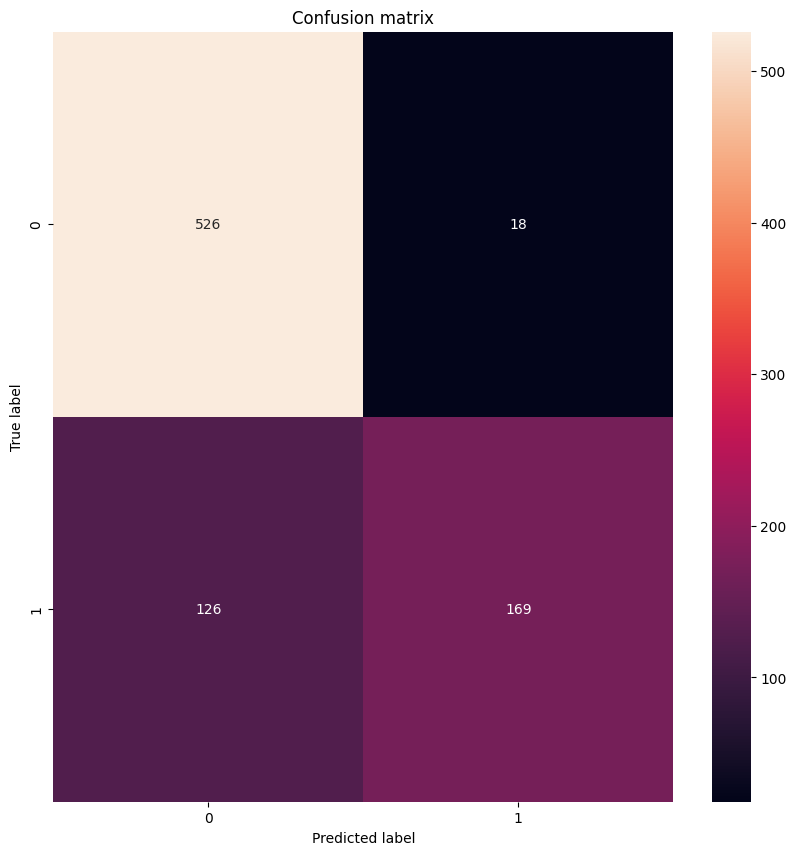

In [213]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## false alarm rate
false alarm rate is the number of false alarms divided by the total number of alarms
## missed detection rate
missed detection rate is the number of missed detections divided by the total number of seizures

In [214]:
#false alarm rate
false_alarm_rate = cm[0][1]/(cm[0][1]+cm[1][1])
print("false alarm rate: ", false_alarm_rate)

#missed detection rate
missed_detection_rate = cm[1][0]/(cm[1][0]+cm[0][0])
print("missed detection rate: ", missed_detection_rate)

false alarm rate:  0.0962566844919786
missed detection rate:  0.19325153374233128


## roc curve
roc curve is a plot of the true positive rate against the false positive rate

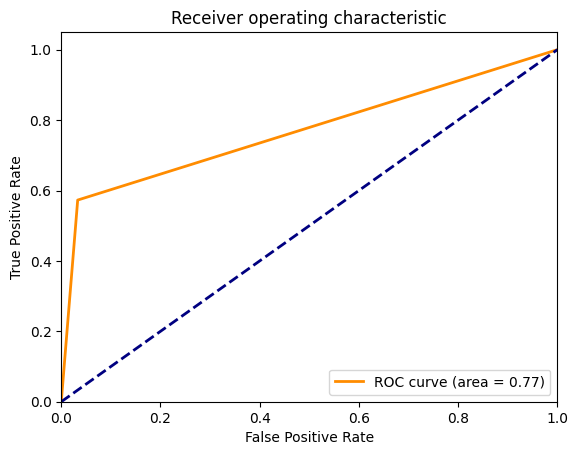

In [215]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [268]:
#test our file at index 20 and see if our model can predict the start and end of the seizure
test_signal = signals[15]
test_signal.shape

(2, 921600)

In [269]:
test_signal = test_signal.T

In [270]:
seizure_seconds_each_file_start_and_end_seconds[15]

('chb05_06.edf', 417, 532)

In [271]:
#delete the first 5% and last 5% of the signal
test_signal = test_signal[0: int(len(test_signal)*0.95)]
test_signal = test_signal[int(len(test_signal)*0.05):]
test_signal.shape

(831744, 2)

In [272]:
#loop through the signal and predict every window_size seconds
signals_window_size = 256 * 5
predictions = []
seizure_times = []
for i in range(0, test_signal.shape[0], signals_window_size):
    try:
        #get the window
        window = test_signal[i:i+signals_window_size]
        #reshape the window
        window = window.reshape(1, signals_window_size, 2)
        #predict the window
        prediction = model.predict(window)
        #get the prediction
        prediction = np.argmax(prediction, axis=1)
        #append the prediction
        predictions.append(prediction)
        if prediction == 1:
            print("start time: ", i)
            print("end time: ", i+signals_window_size)
            seizure_times.append((i/256, (i+signals_window_size)/256))
    except:
        continue
#convert the predictions to a numpy array
predictions = np.array(predictions)
predictions.shape

1/1 [==============================] - 0s 31ms/step
start time:  30720
end time:  32000
1/1 [==============================] - 0s 29ms/step
start time:  46080
end time:  47360
1/1 [==============================] - 0s 33ms/step
start time:  56320
end time:  57600
1/1 [==============================] - 0s 35ms/step
start time:  64000
end time:  65280
1/1 [==============================] - 0s 27ms/step
start time:  65280
end time:  66560
1/1 [==============================] - 0s 22ms/step
start time:  67840
end time:  69120
1/1 [==============================] - 0s 24ms/step
start time:  70400
end time:  71680
1/1 [==============================] - 0s 30ms/step
start time:  71680
end time:  72960
1/1 [==============================] - 0s 26ms/step
start time:  74240
end time:  75520
1/1 [==============================] - 0s 37ms/step
start time:  75520
end time:  76800
1/1 [==============================] - 0s 33ms/step
start time:  76800
end time:  78080
1/1 [===========================

(649, 1)

In [276]:
seizure_times

[(120.0, 125.0),
 (180.0, 185.0),
 (220.0, 225.0),
 (250.0, 255.0),
 (255.0, 260.0),
 (265.0, 270.0),
 (275.0, 280.0),
 (280.0, 285.0),
 (290.0, 295.0),
 (295.0, 300.0),
 (300.0, 305.0),
 (310.0, 315.0),
 (325.0, 330.0),
 (330.0, 335.0),
 (335.0, 340.0),
 (465.0, 470.0),
 (485.0, 490.0),
 (490.0, 495.0),
 (500.0, 505.0),
 (515.0, 520.0),
 (560.0, 565.0),
 (565.0, 570.0),
 (570.0, 575.0),
 (580.0, 585.0),
 (610.0, 615.0),
 (620.0, 625.0),
 (640.0, 645.0),
 (650.0, 655.0),
 (700.0, 705.0),
 (715.0, 720.0),
 (760.0, 765.0),
 (2220.0, 2225.0)]

In [54]:
# #data augmentation

#flip the signal
flipped_signals = np.flip(final_signals, axis=2)
flipped_y_labels = final_y_labels

# #add noise
noise = np.random.normal(0, 0.1, final_signals.shape)
noisy_signals = final_signals + noise
noisy_y_labels = final_y_labels

#concatenate the original, flipped and noisy signals
augmented_signals = np.append(final_signals, flipped_signals, axis=0)
augmented_signals = np.append(augmented_signals, noisy_signals, axis=0)
augmented_y_labels = np.append(final_y_labels, flipped_y_labels, axis=0)
augmented_y_labels = np.append(augmented_y_labels, noisy_y_labels, axis=0)

print(augmented_signals.shape, augmented_y_labels.shape)

(10425, 2, 1280) (10425,)


In [55]:
#normalize the data
augmented_signals = augmented_signals / np.max(augmented_signals)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(augmented_signals, augmented_y_labels, test_size=0.2, random_state=42)

In [57]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [60]:
X_train = X_train.reshape(X_train.shape[0], window_size, 2)
X_test = X_test.reshape(X_test.shape[0], window_size, 2)

## lets build a model that haves our features that we extracted

In [274]:
X_train.shape

(3356, 1280, 2)

In [275]:
features_train, features_test, y_train, y_test = train_test_split(features, final_y_labels, test_size=0.2, random_state=42)

In [277]:
from keras.layers import Input, Concatenate
from keras.models import Model


signal_inputs = Input(shape=(window_size, 2), name="signal_inputs")
features_inputs = Input(shape=(features.shape[1],), name="features_inputs")

signals_model = Conv1D(filters=256, kernel_size=5, activation='relu')(signal_inputs)
signals_model = MaxPooling1D(pool_size=2)(signals_model)
signals_model = Dropout(0.3)(signals_model)
signals_model = Conv1D(filters=128, kernel_size=5, activation='relu')(signals_model)
signals_model = Dropout(0.3)(signals_model)
signals_model = Conv1D(filters=128, kernel_size=5, activation='relu')(signals_model)
signals_model = MaxPooling1D(pool_size=2)(signals_model)
signals_model = Dropout(0.3)(signals_model)
signals_model = Flatten()(signals_model)
signals_model = Dense(features.shape[1], activation='relu')(signals_model)

features_model = Dense(features.shape[1], activation='relu', name="feature_inputs", trainable=False)(features_inputs)

combined = Concatenate()([signals_model, features_model])

combined = Dense(2, activation='softmax')(combined)

model = Model(inputs=[signal_inputs, features_inputs], outputs=combined)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 signal_inputs (InputLayer)     [(None, 1280, 2)]    0           []                               
                                                                                                  
 conv1d_18 (Conv1D)             (None, 1276, 256)    2816        ['signal_inputs[0][0]']          
                                                                                                  
 max_pooling1d_18 (MaxPooling1D  (None, 638, 256)    0           ['conv1d_18[0][0]']              
 )                                                                                                
                                                                                                  
 dropout_18 (Dropout)           (None, 638, 256)     0           ['max_pooling1d_18[0][0]'] 

In [278]:
model.fit(
    [X_train, features_train],
    y_train_categorical,
    epochs=30,
    shuffle=True,
    verbose=2,
)

Epoch 1/10
105/105 - 45s - loss: 144889216.0000 - accuracy: 0.4821 - 45s/epoch - 432ms/step
Epoch 2/10
105/105 - 45s - loss: 95947920.0000 - accuracy: 0.4446 - 45s/epoch - 429ms/step
Epoch 3/10
105/105 - 48s - loss: 85427024.0000 - accuracy: 0.5685 - 48s/epoch - 461ms/step
Epoch 4/10
105/105 - 49s - loss: 76178288.0000 - accuracy: 0.6684 - 49s/epoch - 467ms/step
Epoch 5/10
105/105 - 47s - loss: 65098372.0000 - accuracy: 0.7095 - 47s/epoch - 444ms/step
Epoch 6/10
105/105 - 48s - loss: 59211592.0000 - accuracy: 0.7139 - 48s/epoch - 453ms/step
Epoch 7/10
105/105 - 48s - loss: 55512912.0000 - accuracy: 0.7333 - 48s/epoch - 453ms/step
Epoch 8/10
105/105 - 45s - loss: 51481800.0000 - accuracy: 0.7408 - 45s/epoch - 426ms/step
Epoch 9/10
105/105 - 44s - loss: 49075696.0000 - accuracy: 0.7423 - 44s/epoch - 422ms/step
Epoch 10/10
105/105 - 46s - loss: 46902204.0000 - accuracy: 0.7449 - 46s/epoch - 440ms/step


In [279]:
#evaluate the model
model_loss, model_accuracy = model.evaluate(
    [X_test, features_test], y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
    

27/27 - 3s - loss: 60805652.0000 - accuracy: 0.7426 - 3s/epoch - 104ms/step
Normal Neural Network - Loss: 60805652.0, Accuracy: 0.7425506711006165


In [280]:
#model recall and f1 score and precision
from sklearn.metrics import classification_report

y_pred = model.predict([X_test, features_test])
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_categorical, axis=1)
print(classification_report(y_test, y_pred))

27/27 [==============================] - 3s 106ms/step
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       544
           1       0.65      0.57      0.61       295

    accuracy                           0.74       839
   macro avg       0.72      0.70      0.71       839
weighted avg       0.74      0.74      0.74       839



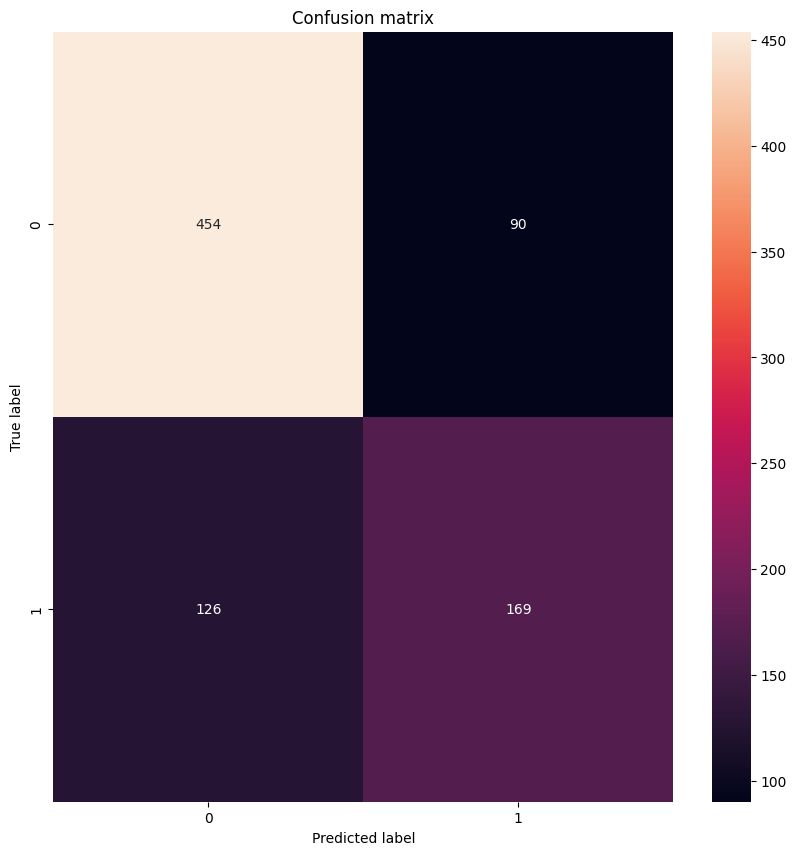

In [281]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [282]:
#false alarm rate and miss rate
false_alarm_rate = cm[0][1] / (cm[0][1] + cm[0][0])
miss_rate = cm[1][0] / (cm[1][0] + cm[1][1])
print("false alarm rate: ", false_alarm_rate)
print("miss rate: ", miss_rate)

false alarm rate:  0.16544117647058823
miss rate:  0.4271186440677966


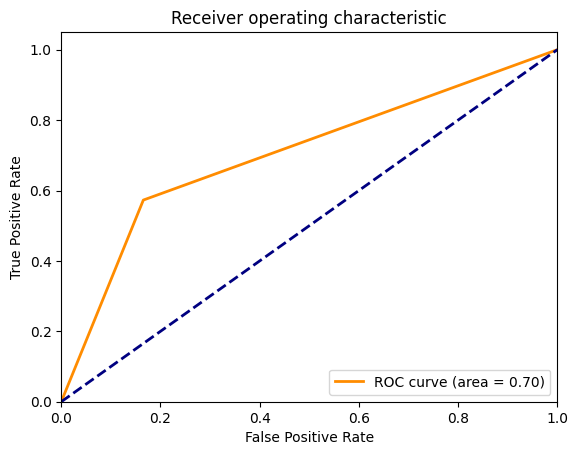

In [284]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [295]:
#test our file at index 20 and see if our model can predict the start and end of the seizure
test_signal = signals[15].T

In [296]:
seizure_seconds_each_file_start_and_end_seconds[15]

('chb05_06.edf', 417, 532)

In [297]:
#delete the first 5% and last 5% of the signal
test_signal = test_signal[0: int(len(test_signal)*0.95)]
test_signal = test_signal[int(len(test_signal)*0.05):]
test_signal.shape

(831744, 2)

In [298]:
#loop through the signal and predict every window_size seconds
signals_window_size = 256 * 5
predictions = []
seizure_times = []
for i in range(0, test_signal.shape[0], signals_window_size):
    try:
        #get the window
        window = test_signal[i:i+signals_window_size]
        #reshape the window
        window = window.reshape(1, signals_window_size, 2)
        #predict the window
        prediction = model.predict(window)
        #get the prediction
        prediction = np.argmax(prediction, axis=1)
        #append the prediction
        predictions.append(prediction)
        if prediction == 1:
            print("start time: ", i)
            print("end time: ", i+signals_window_size)
            seizure_times.append((i/256, (i+signals_window_size)/256))
    except:
        continue
#convert the predictions to a numpy array
predictions = np.array(predictions)
predictions.shape

(0,)